In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load Data
df = pd.read_csv(r'C:\Users\Cecilia\Downloads\ironhack\coursework\projects\week5_labs\amz_uk_price_prediction_dataset.csv')

# Step 2: Understand the Data
df.head(10)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
5,6,B09B97WSLF,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
6,7,B09B9615X2,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
7,8,B01MTB55WH,Anker Soundcore 2 Portable Bluetooth Speaker w...,4.7,103673,39.99,False,0,Hi-Fi Speakers
8,9,B016MO90GW,"Bluetooth Speaker, Anker Soundcore Speaker Upg...",4.7,29909,29.99,False,0,Hi-Fi Speakers
9,10,B09ZQF5GZW,RIENOK Bluetooth Speaker Portable Wireless Blu...,4.5,16014,29.99,False,0,Hi-Fi Speakers


In [9]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


,uid,stars,reviews,price,boughtInLastMonth
count,2.443651e+06,2.443651e+06,2.443651e+06,2.443651e+06,2.443651e+06
mean,1.370545e+06,2.152836e+00,4.806278e+02,8.924381e+01,2.589699e+01
std,8.160562e+05,2.194865e+00,5.944124e+03,3.456089e+02,2.404837e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.589215e+05,0.000000e+00,0.000000e+00,9.990000e+00,0.000000e+00
50%,1.349029e+06,0.000000e+00,0.000000e+00,1.909000e+01,0.000000e+00
75%,2.060686e+06,4.400000e+00,5.900000e+01,4.599000e+01,0.000000e+00
max,2.828593e+06,5.000000e+00,1.356658e+06,1.000000e+05,5.000000e+04


In [13]:
import pandas as pd

# Step 1: Create a crosstab between 'category' and 'isBestSeller'
crosstab = pd.crosstab(df['category'], df['isBestSeller'])

# Step 2: Calculate the proportion of best-sellers in each category
crosstab['proportion_best_seller'] = crosstab[True] / crosstab.sum(axis=1)

# Step 3: Sort the categories based on the proportion of best-sellers in descending order
sorted_crosstab = crosstab.sort_values(by='proportion_best_seller', ascending=False)

# Display the sorted crosstab
print(sorted_crosstab[['proportion_best_seller']])

isBestSeller                      proportion_best_seller
category                                                
Grocery                                         0.058135
Smart Home Security & Lighting                  0.057692
Health & Personal Care                          0.057686
Mobile Phone Accessories                        0.042471
Power & Hand Tools                              0.035339
...                                                  ...
CD, Disc & Tape Players                         0.000000
General Music-Making Accessories                0.000000
Snowboard Boots                                 0.000000
Boxes & Organisers                              0.000000
eBook Readers & Accessories                     0.000000

[296 rows x 1 columns]


In [18]:
import pandas as pd
import scipy.stats as stats
import numpy as np

# Step 1: Create the crosstab between 'category' and 'isBestSeller'
crosstab = pd.crosstab(df['category'], df['isBestSeller'])

# Step 2: Perform the Chi-square test
chi2_stat, p_val, dof, expected = stats.chi2_contingency(crosstab)

# Display the Chi-square test results
print(f"Chi-square statistic: {chi2_stat}")
print(f"P-value: {p_val}")
print(f"Degrees of freedom: {dof}")
print(f"Expected frequencies:\n{expected}")

Chi-square statistic: 36540.20270061387
P-value: 0.0
Degrees of freedom: 295
Expected frequencies:
[[2.47190130e+02 8.09870149e-01]
 [4.05371878e+03 1.32812173e+01]
 [2.49183599e+02 8.16401360e-01]
 [1.69145827e+03 5.54173243e+00]
 [2.53170536e+02 8.29463782e-01]
 [8.50214439e+03 2.78556144e+01]
 [1.06650580e+02 3.49419782e-01]
 [2.57157474e+02 8.42526204e-01]
 [9.51781673e+03 3.11832664e+01]
 [1.50008526e+04 4.91473619e+01]
 [9.32544700e+03 3.05530045e+01]
 [2.38219520e+02 7.80479700e-01]
 [3.22941944e+03 1.05805616e+01]
 [9.44704859e+03 3.09514084e+01]
 [6.68808779e+03 2.19122125e+01]
 [5.26275760e+02 1.72423967e+00]
 [1.90296531e+04 6.23469391e+01]
 [2.77191835e+03 9.08164873e+00]
 [2.53170536e+02 8.29463782e-01]
 [4.04674164e+02 1.32583581e+00]
 [1.92489346e+04 6.30653723e+01]
 [3.10482764e+03 1.01723609e+01]
 [2.04330551e+02 6.69449115e-01]
 [6.28839730e+03 2.06027047e+01]
 [5.23385231e+03 1.71476942e+01]
 [9.52180367e+03 3.11963288e+01]
 [2.48186864e+02 8.13135755e-01]
 [9.465986

In [20]:
# Step 3: Compute Cramér's V
n = crosstab.sum().sum()  # Total number of observations
min_dim = min(crosstab.shape) - 1  # Minimum dimension minus 1 (for each variable)
cramers_v = np.sqrt(chi2_stat / (n * min_dim))

# Display Cramér's V
print(f"Cramér's V: {cramers_v}")

Cramér's V: 0.1222829439760564


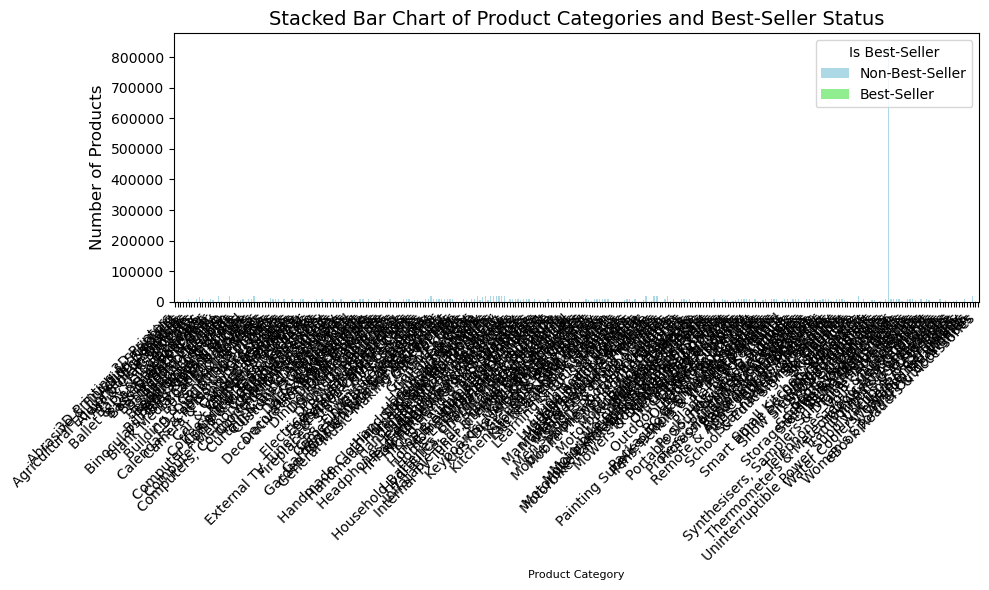

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Create the crosstab between 'category' and 'isBestSeller'
crosstab = pd.crosstab(df['category'], df['isBestSeller'])

# Step 2: Plot a stacked bar chart
ax = crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightblue', 'lightgreen'])

# Step 3: Customize the plot
plt.title('Stacked Bar Chart of Product Categories and Best-Seller Status', fontsize=14)
plt.xlabel('Product Category', fontsize=8)
plt.ylabel('Number of Products', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.legend(title='Is Best-Seller', labels=['Non-Best-Seller', 'Best-Seller'], loc='upper right')

# Step 4: Display the plot
plt.tight_layout()  # To prevent overlapping of labels
plt.show()

In [29]:
import pandas as pd

# Step 1: Calculate the first quartile (Q1) and third quartile (Q3) for the price column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

# Step 2: Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Step 3: Determine the lower and upper bounds for valid prices
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 4: Filter the dataset to exclude rows where the price is outside the bounds
df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Step 5: Check the shape of the new dataframe to see how many rows were removed
print(f"Original dataset shape: {df.shape}")
print(f"Dataset shape after removing outliers: {df_no_outliers.shape}")

Original dataset shape: (2443651, 9)
Dataset shape after removing outliers: (2115963, 9)


C:\Users\Cecilia\AppData\Local\Temp\ipykernel_15256\3104579890.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_top_20, x='category', y='price', palette='Set2')


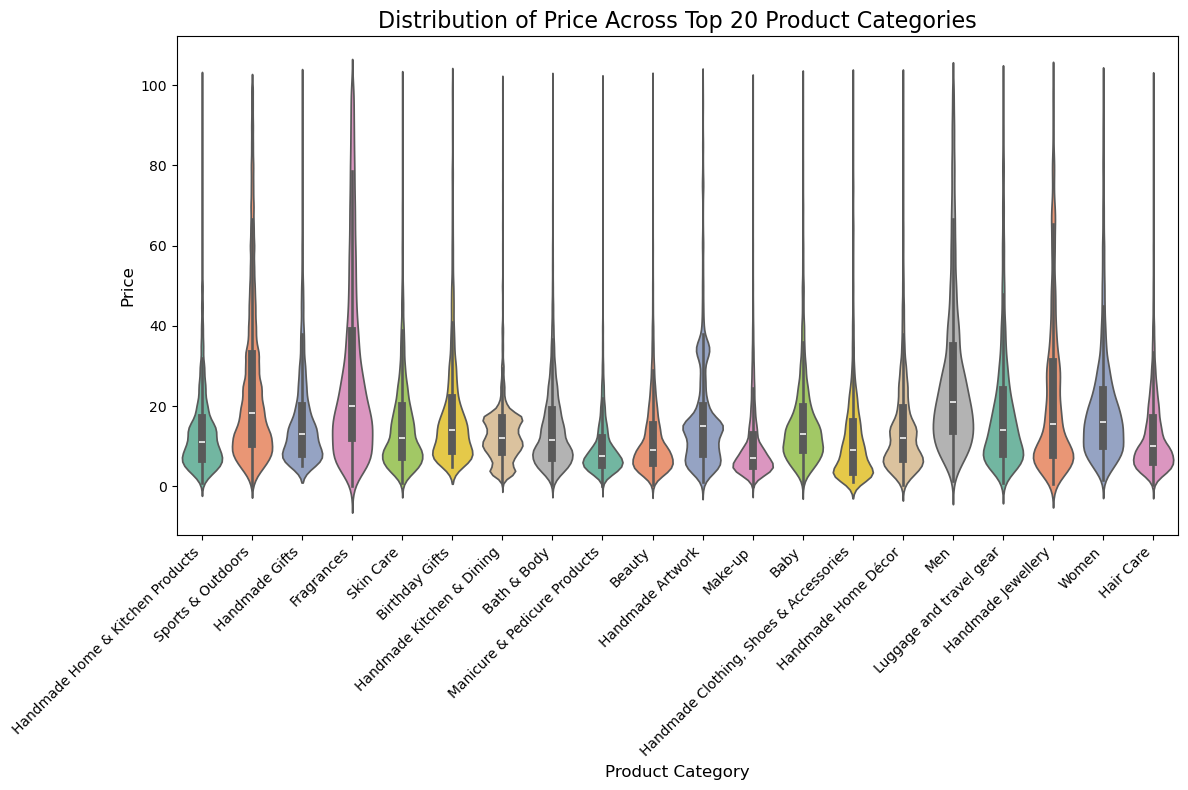

C:\Users\Cecilia\AppData\Local\Temp\ipykernel_15256\3104579890.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_no_outliers, x='category', y='price', palette='Set2')


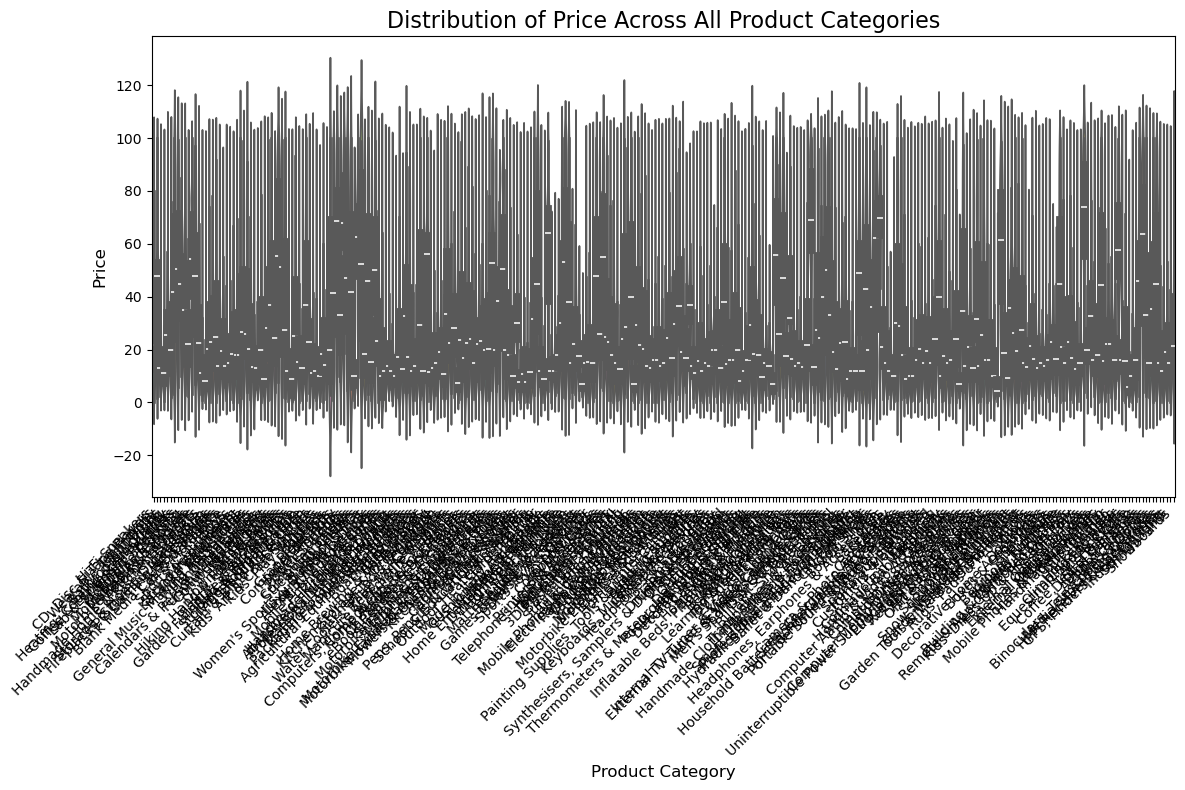

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Filter the top 20 categories by count
top_20_categories = df_no_outliers['category'].value_counts().head(20).index
df_top_20 = df_no_outliers[df_no_outliers['category'].isin(top_20_categories)]

# Step 2: Create a violin plot for price distribution across top 20 categories
plt.figure(figsize=(12, 8))
sns.violinplot(data=df_top_20, x='category', y='price', palette='Set2')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Price Across Top 20 Product Categories', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.tight_layout()  # To prevent overlapping of labels
plt.show()

# Step 3: Create a violin plot for price distribution across all categories (no filter)
plt.figure(figsize=(12, 8))
sns.violinplot(data=df_no_outliers, x='category', y='price', palette='Set2')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Price Across All Product Categories', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.tight_layout()  # To prevent overlapping of labels
plt.show()

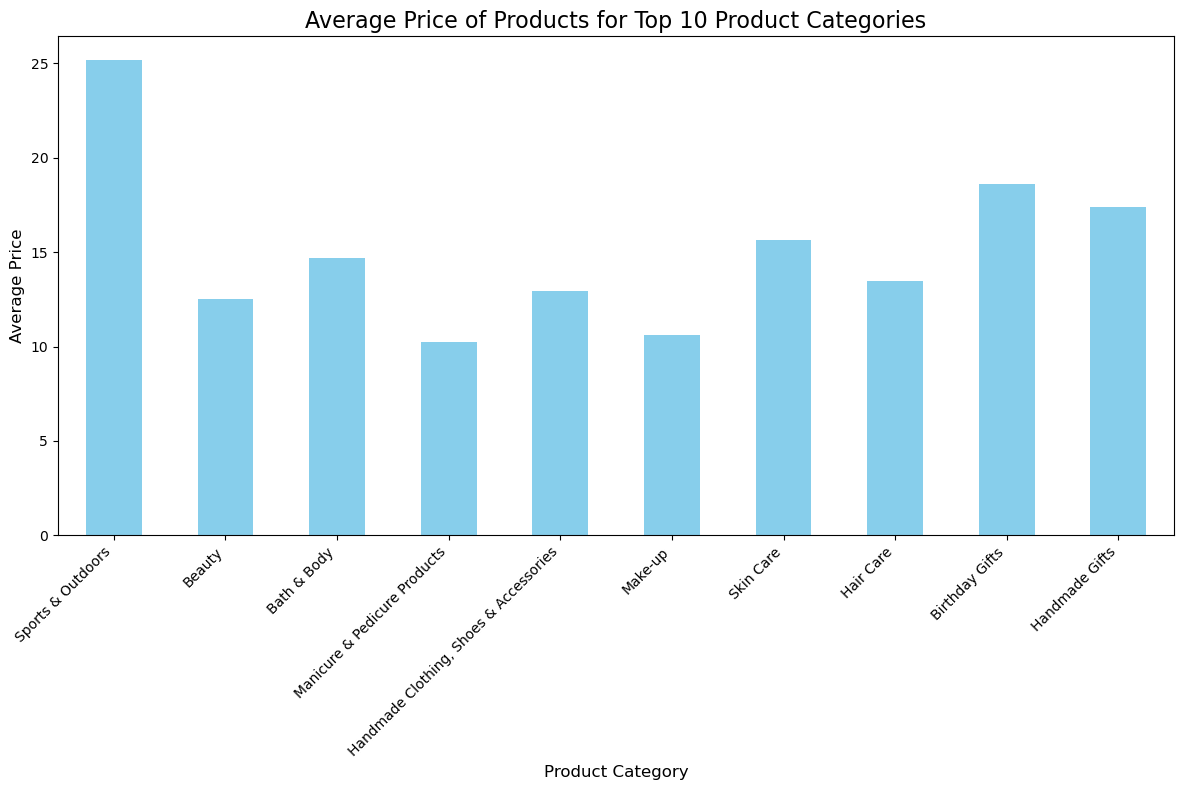

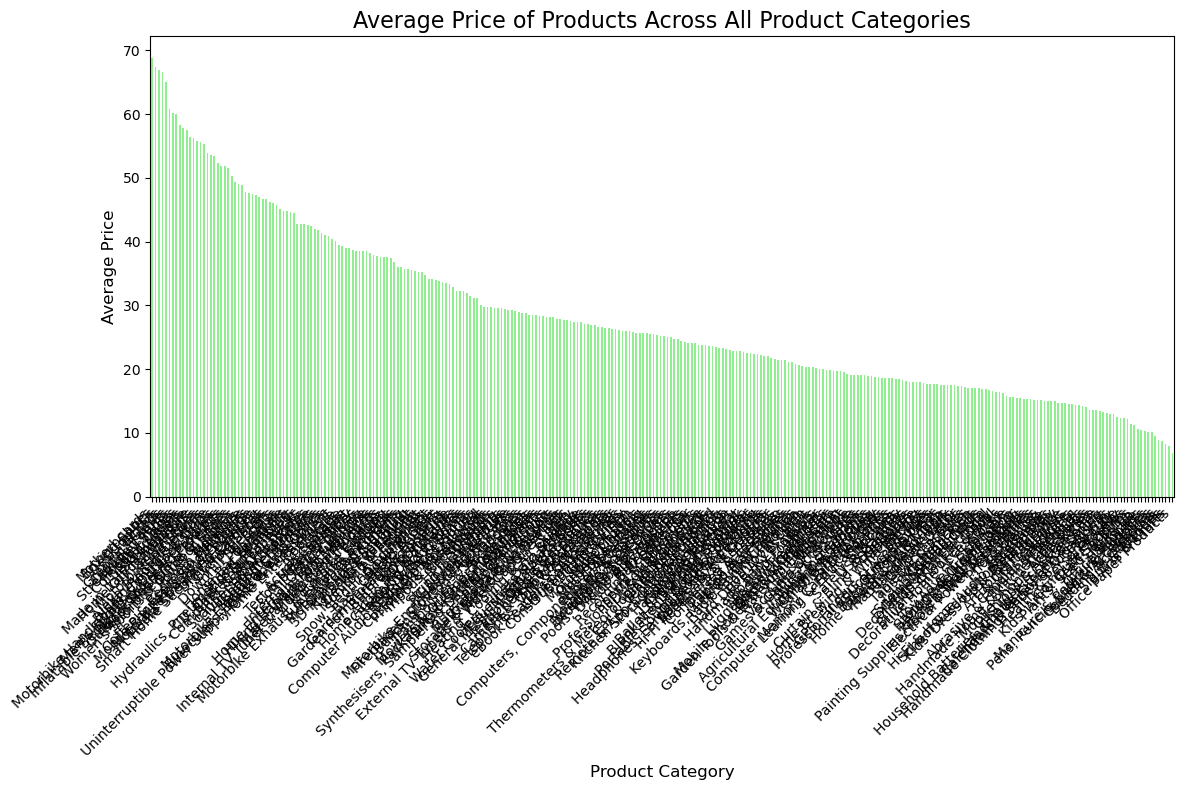

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Calculate the average price per category
avg_price_per_category = df_no_outliers.groupby('category')['price'].mean().sort_values(ascending=False)

# Step 2: Filter the top 10 categories by count for the bar chart (based on the number of products per category)
top_10_categories = df_no_outliers['category'].value_counts().head(10).index
avg_price_top_10 = avg_price_per_category[top_10_categories]

# Step 3: Create the bar chart for the top 10 categories
plt.figure(figsize=(12, 8))
avg_price_top_10.plot(kind='bar', color='skyblue')
plt.title('Average Price of Products for Top 10 Product Categories', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Step 4: Create the bar chart for all categories (no filtering)
plt.figure(figsize=(12, 8))
avg_price_per_category.plot(kind='bar', color='lightgreen')
plt.title('Average Price of Products Across All Product Categories', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\Cecilia\AppData\Local\Temp\ipykernel_15256\3472653550.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_10, x='category', y='stars', palette='Set2')


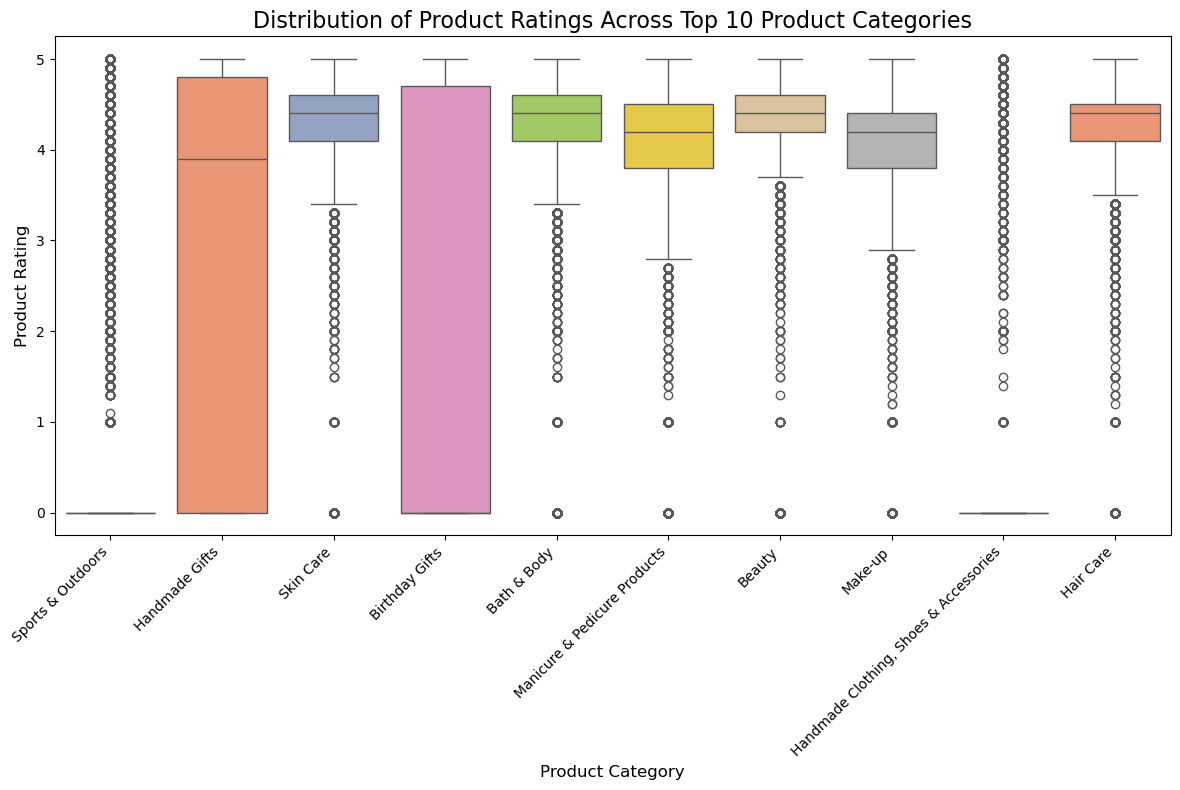

C:\Users\Cecilia\AppData\Local\Temp\ipykernel_15256\3472653550.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_no_outliers, x='category', y='stars', palette='Set2')


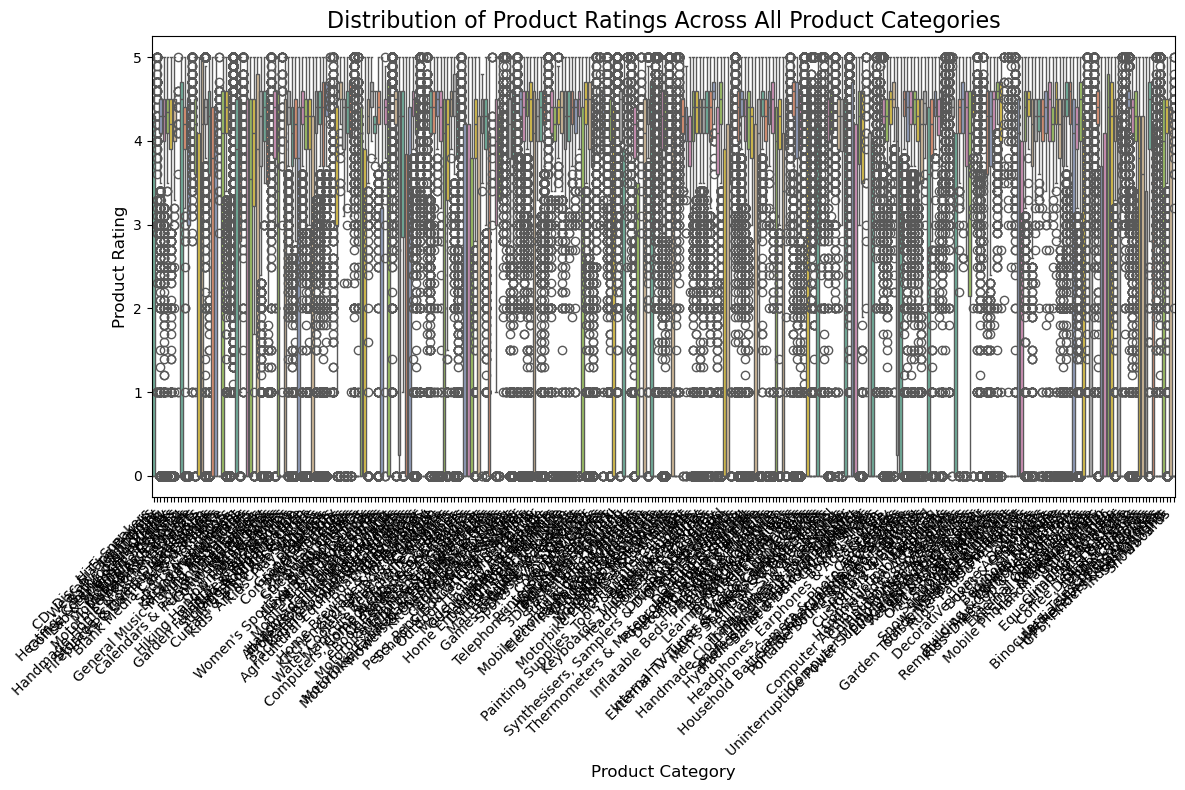

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Filter the top 10 categories by count (based on the number of products per category)
top_10_categories = df_no_outliers['category'].value_counts().head(10).index
df_top_10 = df_no_outliers[df_no_outliers['category'].isin(top_10_categories)]

# Step 2: Create the box plot for ratings across the top 10 categories
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_top_10, x='category', y='stars', palette='Set2')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Product Ratings Across Top 10 Product Categories', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Product Rating', fontsize=12)
plt.tight_layout()
plt.show()

# Step 3: Create the box plot for ratings across all categories (no filtering)
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_no_outliers, x='category', y='stars', palette='Set2')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Product Ratings Across All Product Categories', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Product Rating', fontsize=12)
plt.tight_layout()
plt.show()

In [47]:
import pandas as pd

# Step 1: Calculate the Pearson correlation between 'price' and 'stars'
correlation = df_no_outliers['price'].corr(df_no_outliers['stars'])

# Step 2: Print the correlation coefficient
print(f"Correlation coefficient between price and stars: {correlation}")


Correlation coefficient between price and stars: -0.0776729987818137


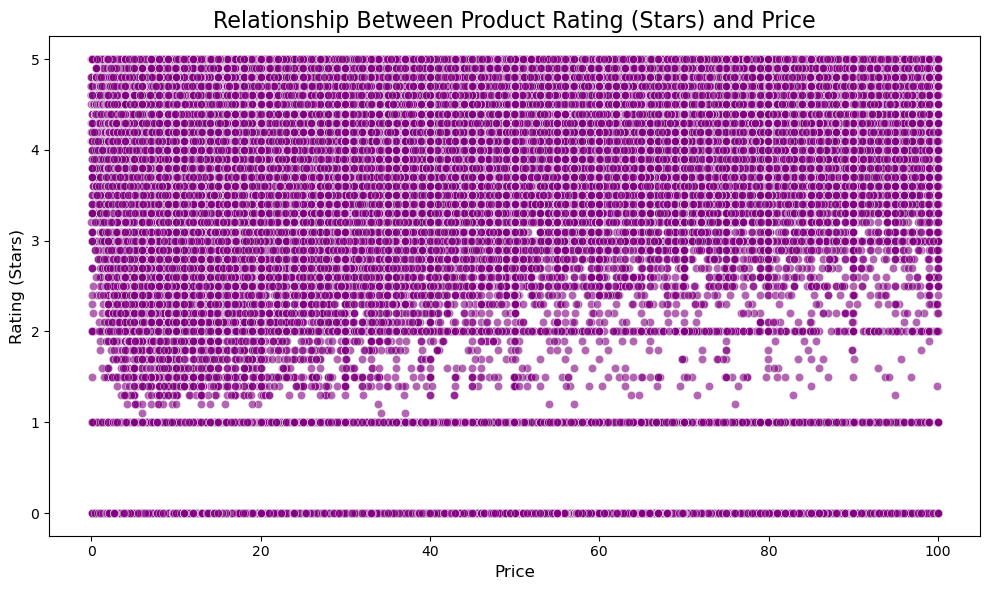

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Scatter plot of Rating vs Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_no_outliers, x='price', y='stars', alpha=0.6, color='purple')
plt.title('Relationship Between Product Rating (Stars) and Price', fontsize=16)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Rating (Stars)', fontsize=12)
plt.tight_layout()
plt.show()